In [2]:
import pandas as pd
import json


y = []
with open("data\data_combined.json", 'r', encoding='utf-8') as f:
    y = json.load(f)

In [5]:
import pandas as pd
import json


y = []
with open("data\data_combined.json", 'r', encoding='utf-8') as f:
    y = json.load(f)

df = pd.DataFrame(y)
df = df.T
 
df.columns = ['Цена аренды', 'Агенство недвижимости', 'Минимальное время до метро, мин', 'Общая площадь,  м²', 'Жилая площадь,  м²', 'Площадь кухни,  м²', 'Этаж квартиры', 'Этажей в доме', "Год постройки", "Описание", "Холодильник", "Посудомоечная машина", "Стиральная машина", "Мебель в комнатах", "Мебель на кухне", "Телевизор", "Интернет", "Кондиционер", "Душевая кабина", "Ванна", "Тип ремонта", "Окна на улицу", "Окна во двор", "Можно с детьми", "Можно с животными", "Полный адрес", "Улица", "Район", "Рекомендованная цена", "Залог", "Комиссия", "Предоплата(за сколько месяцев)", "Длительность съёма", "Возможность торга"]
df = df.reindex(columns = ['Агенство недвижимости', 'Цена аренды','Описание',
       'Минимальное время до метро, мин', 'Общая площадь,  м²',
       'Жилая площадь,  м²', 'Площадь кухни,  м²', 'Этаж квартиры',
       'Этажей в доме', 'Год постройки', 'Холодильник', 'Посудомоечная машина', 'Стиральная машина',
       'Мебель в комнатах',  'Мебель на кухне', 'Телевизор', 'Интернет', 'Кондиционер',
       'Душевая кабина', 'Ванна', 'Тип ремонта', 'Окна на улицу', 'Окна во двор', 'Можно с детьми',
       'Можно с животными', 'Полный адрес', 'Улица', 'Район',
       'Рекомендованная цена', 'Залог', 'Комиссия', 'Предоплата (за сколько месяцев)',
       'Длительность съёма', 'Возможность торга'])
df = df.drop(columns=['Стиральная машина'])

df.head().style.hide_index()


In [14]:
df.loc[df['Рекомендованная цена']== 0, 'Рекомендованная цена'] = 'Отсутствует'
df.loc[df['Залог']== 0, 'Залог'] = 'Отсутствует'
df.loc[df['Комиссия']== 0, 'Комиссия'] = 'Отсутствует'
df.loc[df['Длительность съёма']== 0, 'Длительность съёма'] = 'Отсутствует'
df.loc[df['Предоплата (за сколько месяцев)']== 0, 'Предоплата (за сколько месяцев)'] = 'Отсутствует'
df.loc[df['Возможность торга']== 0, 'Возможность торга'] = 'Отсутствует'
df.loc[df['Можно с животными']== 0, 'Можно с животными'] = 'Нет'
df.loc[df['Можно с животными']== 1, 'Можно с животными'] = 'Да'
df.loc[df['Можно с детьми']== 0, 'Можно с детьми'] = 'Нет'
df.loc[df['Можно с детьми']== 1, 'Можно с детьми'] = 'Да'
df.loc[df['Тип ремонта']== 0, 'Тип ремонта'] = 'Не указан'
df.loc[df['Тип ремонта']== 1, 'Тип ремонта'] = 'Без ремонта'
df.loc[df['Тип ремонта']== 2, 'Тип ремонта'] = 'Косметический'
df.loc[df['Тип ремонта']== 3, 'Тип ремонта'] = 'Евроремонт'
df.loc[df['Тип ремонта']== 4, 'Тип ремонта'] = 'Дизайнерский'
df.loc[df['Окна на улицу']== 0, 'Окна на улицу'] = 'Нет'
df.loc[df['Окна на улицу']== 1, 'Окна на улицу'] = 'Да'
df.loc[df['Окна во двор']== 0, 'Окна во двор'] = 'Нет'
df.loc[df['Окна во двор']== 1, 'Окна во двор'] = 'Да'

In [ ]:
for elem in list(df.columns):
    df.loc[df[elem]==0, elem] = 'Нет данных'
df.head().style.hide_index()

код по визуализации года/этажей

In [78]:
df1 = df[df['Год постройки'] != 'Нет данных']
df2 = df1[df1['Этаж квартиры'] != 'Нет данных']
df3 = df2[df2['Этажей в доме'] != 'Нет данных']

In [ ]:

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

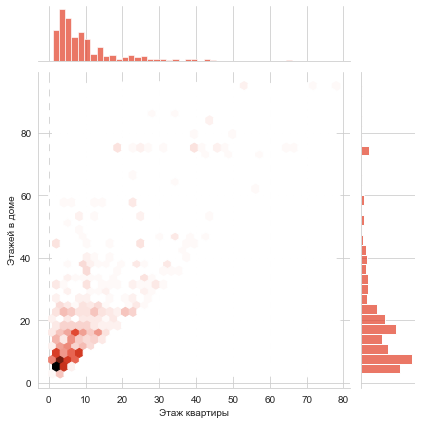

In [89]:
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable = True)

plot = df3['Год постройки'].iplot(kind = 'hist', xTitle = 'Год постройки', yTitle = 'Количество квартир', title = 'Распределение квартир по году постройки дома')
plt.show()


plot = df3["Этаж квартиры"].iplot(kind = 'hist', xTitle = "Этаж квартиры", yTitle = 'Количество квартир', title = 'Распределение квартир по этажу')
plt.show()

plot = df3["Этажей в доме"].iplot(kind = 'hist', xTitle = "Этажей в доме", yTitle = 'Количество квартир', title = 'Распределение квартир по количеству этажей в доме')
plt.show()

sns_plot = sns.jointplot(x = 'Этаж квартиры', y = 'Этажей в доме', data = df3[['Этаж квартиры', 'Этажей в доме']], kind = 'hex')
plt.show()

код по визулизации ремонта